In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd


# parametros

num_agentes = 1000000
av_num_contactos = 6
disp_num_contactos = 4
prob_contagio = .1
t_rec = 14



In [37]:
def generar_red_vecinos(nagentes,av_num_contactos,disp_num_contactos,d=1.):
    posiciones = rnd.uniform(-1,1,(num_agentes,2))
    neighbours = [[] for i in range(num_agentes)]
    for i in range(num_agentes):
        pi = posiciones[i]
        for j,pj in enumerate(posiciones):
            if j<=i:
                continue
            dist = pi-pj
            dist = np.exp(-(dist[0]**2+dist[1]**2)/d**2)
            if dist > rnd.uniform(0,1):
                neighbours[i].append(j)
                neighbours[j].append(i)
    neighbours = [sorted(nb) for nb in neighbours]
    return neighbours, posiciones



def generar_red_todos_vs_todos(nagentes,av_num_contactos,disp_num_contactos):
    posiciones = rnd.uniform(-1,1,(num_agentes,2))
    neighbours = [[] for i in range(num_agentes)]
    net = []
    for i in range(num_agentes):
        nbonds = rnd.randint((av_num_contactos-disp_num_contactos)/2,(av_num_contactos+disp_num_contactos)/2+1 )
        for k in range(nbonds):
            while True:
                j = rnd.randint(0,num_agentes)
                if j == i:
                    continue
                pair = (i,j)
                if j<i:
                    pair = (j,i)
                if pair not in net:
                    neighbours[i].append(j)
                    neighbours[j].append(i)
                    break

    neighbours = [sorted(nb) for nb in neighbours]
    return neighbours, posiciones


def generar_red_subredes_iguales_unico_puente(nagentes,av_num_contactos,disp_num_contactos):
    posiciones = rnd.uniform(0,1,(num_agentes,2))
    posiciones = np.array([ [p[0]*(-1)**i,p[1]]  for i,p in enumerate(posiciones)])
    net = []
    neighbours = [[] for i in range(num_agentes)]
    neighbours[0].append(1)
    neighbours[1].append(0)
    
    for i in range(num_agentes):
        nbonds = rnd.randint((av_num_contactos-disp_num_contactos)/2,(av_num_contactos+disp_num_contactos)/2+1 )
        for k in range(nbonds):
            while True:
                j = rnd.randint(0,num_agentes)
                if i+j % 2==0:  # Divido a los agentes en dos grupos (pares e impares)
                    continue
                pair = (i,j)
                if j<i:
                    pair = (j,i)
                if pair not in net:
                    neighbours[i].append(j)
                    neighbours[j].append(i)
                    break

    neighbours = [sorted(nb) for nb in neighbours]
    return neighbours, posiciones


In [28]:
#redlocal=(neighbours,posiciones)

In [38]:
# Estado inicial
state = [-1 for k in range(num_agentes)]
tinfected = [-1 for k in range(num_agentes)]
state[0] = 0
num_infectados = [1/num_agentes]
num_confirmados = [1/num_agentes]

neighbours, posiciones = generar_red_todos_vs_todos(num_agentes,av_num_contactos,disp_num_contactos)


#plt.scatter(5*posiciones[:,0],5*posiciones[:,1])

#for i,ns in enumerate(neighbours):
#    for j in ns:
#        plt.plot(np.array([5*posiciones[i][0],5*posiciones[j][0]]),
#                 np.array([5*posiciones[i][1],5*posiciones[j][1]]),c="blue")

#plt.show()

step  0
step  1
step  2
step  3
step  4
step  5
step  6
step  7
step  8
step  9
step  10
step  11
step  12
step  13
step  14
step  15
step  16
step  17
step  18
step  19
step  20
step  21
step  22
step  23
step  24
step  25
step  26
step  27
step  28
step  29
step  30
step  31
step  32
step  33
step  34
step  35
step  36
step  37
step  38
step  39
step  40
step  41
step  42
step  43
step  44
step  45
step  46
step  47
step  48
step  49
step  50
step  51
step  52
step  53
step  54
step  55
step  56
step  57
step  58
step  59
step  60
step  61
step  62
step  63
step  64
step  65
step  66
step  67
step  68
step  69
step  70
step  71
step  72
step  73
step  74
step  75
step  76
step  77
step  78
step  79
step  80
step  81
step  82
step  83
step  84
step  85
step  86
step  87
step  88
step  89


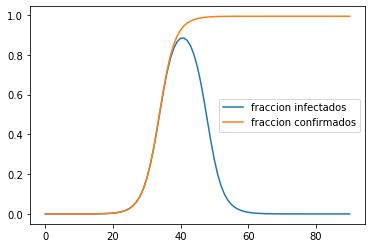

In [39]:
################################################################################
# Red: al azar....


###########################################################################



def evol_net():
    global state,t_rec, prob_contagio, neighbours, num_agentes,\
           num_infectados,num_confirmados
    newstate = [s for s in state]
    for i in range(num_agentes):
        if state[i] == t_rec: # Ya se recuperó
            continue
        if state[i]>=0:  # Está infectado, en recuperación
            newstate[i] = state[i]+1
            continue
        # Es susceptible: miro a sus vecinos y veo si lo infecto
        for j in neighbours[i]:
            if state[j] == t_rec or state[j]==-1:
                continue
            if rnd.uniform()<prob_contagio:
                newstate[i] = 0 # i se contagió....
    state = newstate
    tmp = np.array(newstate)
    tmp = tmp[(tmp!=-1)]
    num_confirmados.append(len(tmp)/num_agentes)
    tmp = tmp[tmp!=t_rec]
    num_infectados.append(len(tmp)/num_agentes)
    return

for k in range(90):
    print("step ", k)

    evol_net()
    
plt.plot(num_infectados,label="fraccion infectados")
plt.plot(num_confirmados,label="fraccion confirmados")
plt.legend()